# <center> Lista 05 - Aprendizado de Máquina </center>

**Aluno(a):** Marianna de Pinho Severo <br>
**Matrícula:** 374856 <br>
**Professor(a):** Regis Pires

Nesta lista trabalharemos com o *dataset* [Boston House Price Dataset](https://www.google.com/url?q=https%3A%2F%2Farchive.ics.uci.edu%2Fml%2Fmachine-learning-databases%2Fhousing%2Fhousing.data&sa=D&sntz=1&usg=AFQjCNEke-pt5MM0sLtzR9aSXgkHVT_K8A), cujas informações estão em [housing.names](https://www.google.com/url?q=https%3A%2F%2Farchive.ics.uci.edu%2Fml%2Fmachine-learning-databases%2Fhousing%2Fhousing.names&sa=D&sntz=1&usg=AFQjCNGCmwFf8uUyRkfSExJ7seLiHZMDOw). O objetivo é a predição do valor de venda de imóveis a partir das *features* presentes no conjunto de dados.

## 1) Baixar e carregar os dados.

### Passo 01: Importar bibliotecas
Primeiramente, importaremos as bibliotecas necessárias para a realização das atividades pedidas na lista.

In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #biblioteca para construção do scatterplot
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from ml_libs import regressao_linear_GD #arquivo onde a regressão linear com gradiente descendente está implementada
from ml_libs import metricas #arquivo onde o cálculo do rmse está implementado
from ml_libs import standardization_normalization
from importlib import reload #biblioteca utilizada para recarregar as bibliotecas importadas

### Passo 02: Criar função para carregamento dos dados
DATASET_PATH é um define que indica onde o conjunto de dados está armazenado no computador. Nesse caso, está em uma pasta, chamada dataset, localizada dentro da pasta em que este notebook se encontra.

In [2]:
DATASET_PATH = "dataset/"

A função load_housing_data é responsável por abrir o arquivo que contém o conjunto de dados, chamado housing.csv, e retornar seus valores no formato DataFrame, que é uma estrutura de dados de duas dimensões, cujos eixos são rotulados.

In [3]:
def load_housing_data(dataset_path = DATASET_PATH):
    cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
    csv_path = os.path.join(dataset_path, "housing.csv")
    return pd.read_csv(csv_path, names=cols)

### Passo 03: Carregar dados
Por fim, carregaremos o conjunto de dados dentro da variável housing, que será utilizada para a realização das próximas operações.

In [4]:
housing = load_housing_data()

## 2) Breve análise dos dados.
Nessa etapa, utilizaremos algumas das funções apresentadas no Capítulo 02 do livro **Hands-On Machine Learning with Scikit-Learn and TensorFlow** e no Capítulo 10 do livro **Python Machine Learning** para uma breve visualização e análise do conjunto de dados.

### Passo 01: Método head()
O conjunto de dados (*dataset*) está armazenado na variável *housing*. Com o método *head()*, apresentamos as cinco primeiras linhas desse conjunto, em formato de tabela. Nela, é possível ver que o conjunto de dados possui 14 atributos, que são: **CRIM** (per capita crime rate by town), **ZN** (proportion of residential land zoned for lots over 25,000 sq.ft), **INDUS** (proportion of non-retail business acres per town), **CHAS** (Charles River dummy variable), **NOX** (nitric oxides concentration "parts per 10 million"), **RM** (average number of rooms per dwelling), **AGE** (proportion of owner-occupied units built prior to 1940), **DIS** (weighted distances to five Boston employment centres), **RAD** (index of accessibility to radial highways), **TAX** (full-value property-tax rate per \$10,000), **PTRATIO** (pupil-teacher ratio by town), **\B** (1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town), **LSTAT** (lower status of the population) e **MEDV** (Median value of owner-occupied homes in $1000's). Com esses atributos, pretendemos determinar o valor médio de uma casa, que é o atributo apresentado na última coluna (MEDV).

In [5]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Passo 02: Método info()
Utilizando o método *info()*, obtemos uma descrição rápida dos dados. É possível observar que o *dataset* possui 506 linhas, sendo elas numeradas de 0 a 505; que ele possui 14 colunas, em que as treze primeiras são para os atributos e a última é para o *label*, ou classe, dos dados; que 12 dos atributos são do tipo *float*, incluíndo o "label", e dois são do tipo *int*; também é possível observar que todas as linhas estão preenchidas, o que significa que não há linhas nem colunas sem valores.

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


### Passo 03: Método describe()
Com o método *describe()*, uma tabela com um resumo de todos os dados do *dataset* é mostrada. A linha **std** indica o *desvio padrão* dos dados. Já, as linhas **25%**, **50%** e **75%** indicam os percentis, que são valores abaixo dos quais uma determinada porcentagem de observações em um grupo recai.

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Passo 04: Construindo um Scatterplot
O *scatterplot*, ou gráfico de dispersão, é utilizado para a representação da relação entre duas ou mais variáveis. Isso é feito por meio da projeção de um conjunto de dados, representados por pontos, em eixos cartesianos. Quando ele é feito para duas variáveis, a projeção do ponto no eixo horizontal representa o valor de uma das variáveis e a projeção do mesmo ponto no eixo vertical, o valor da outra variável ([Gráfico de Dispersão](https://pt.wikipedia.org/wiki/Gr%C3%A1fico_de_dispers%C3%A3o)). Ele é empregado para a verificação se existe uma relação de causa e efeito entre as variáveis de natureza quantitativa, não provando, entretanto, que uma afeta realmente a outra.

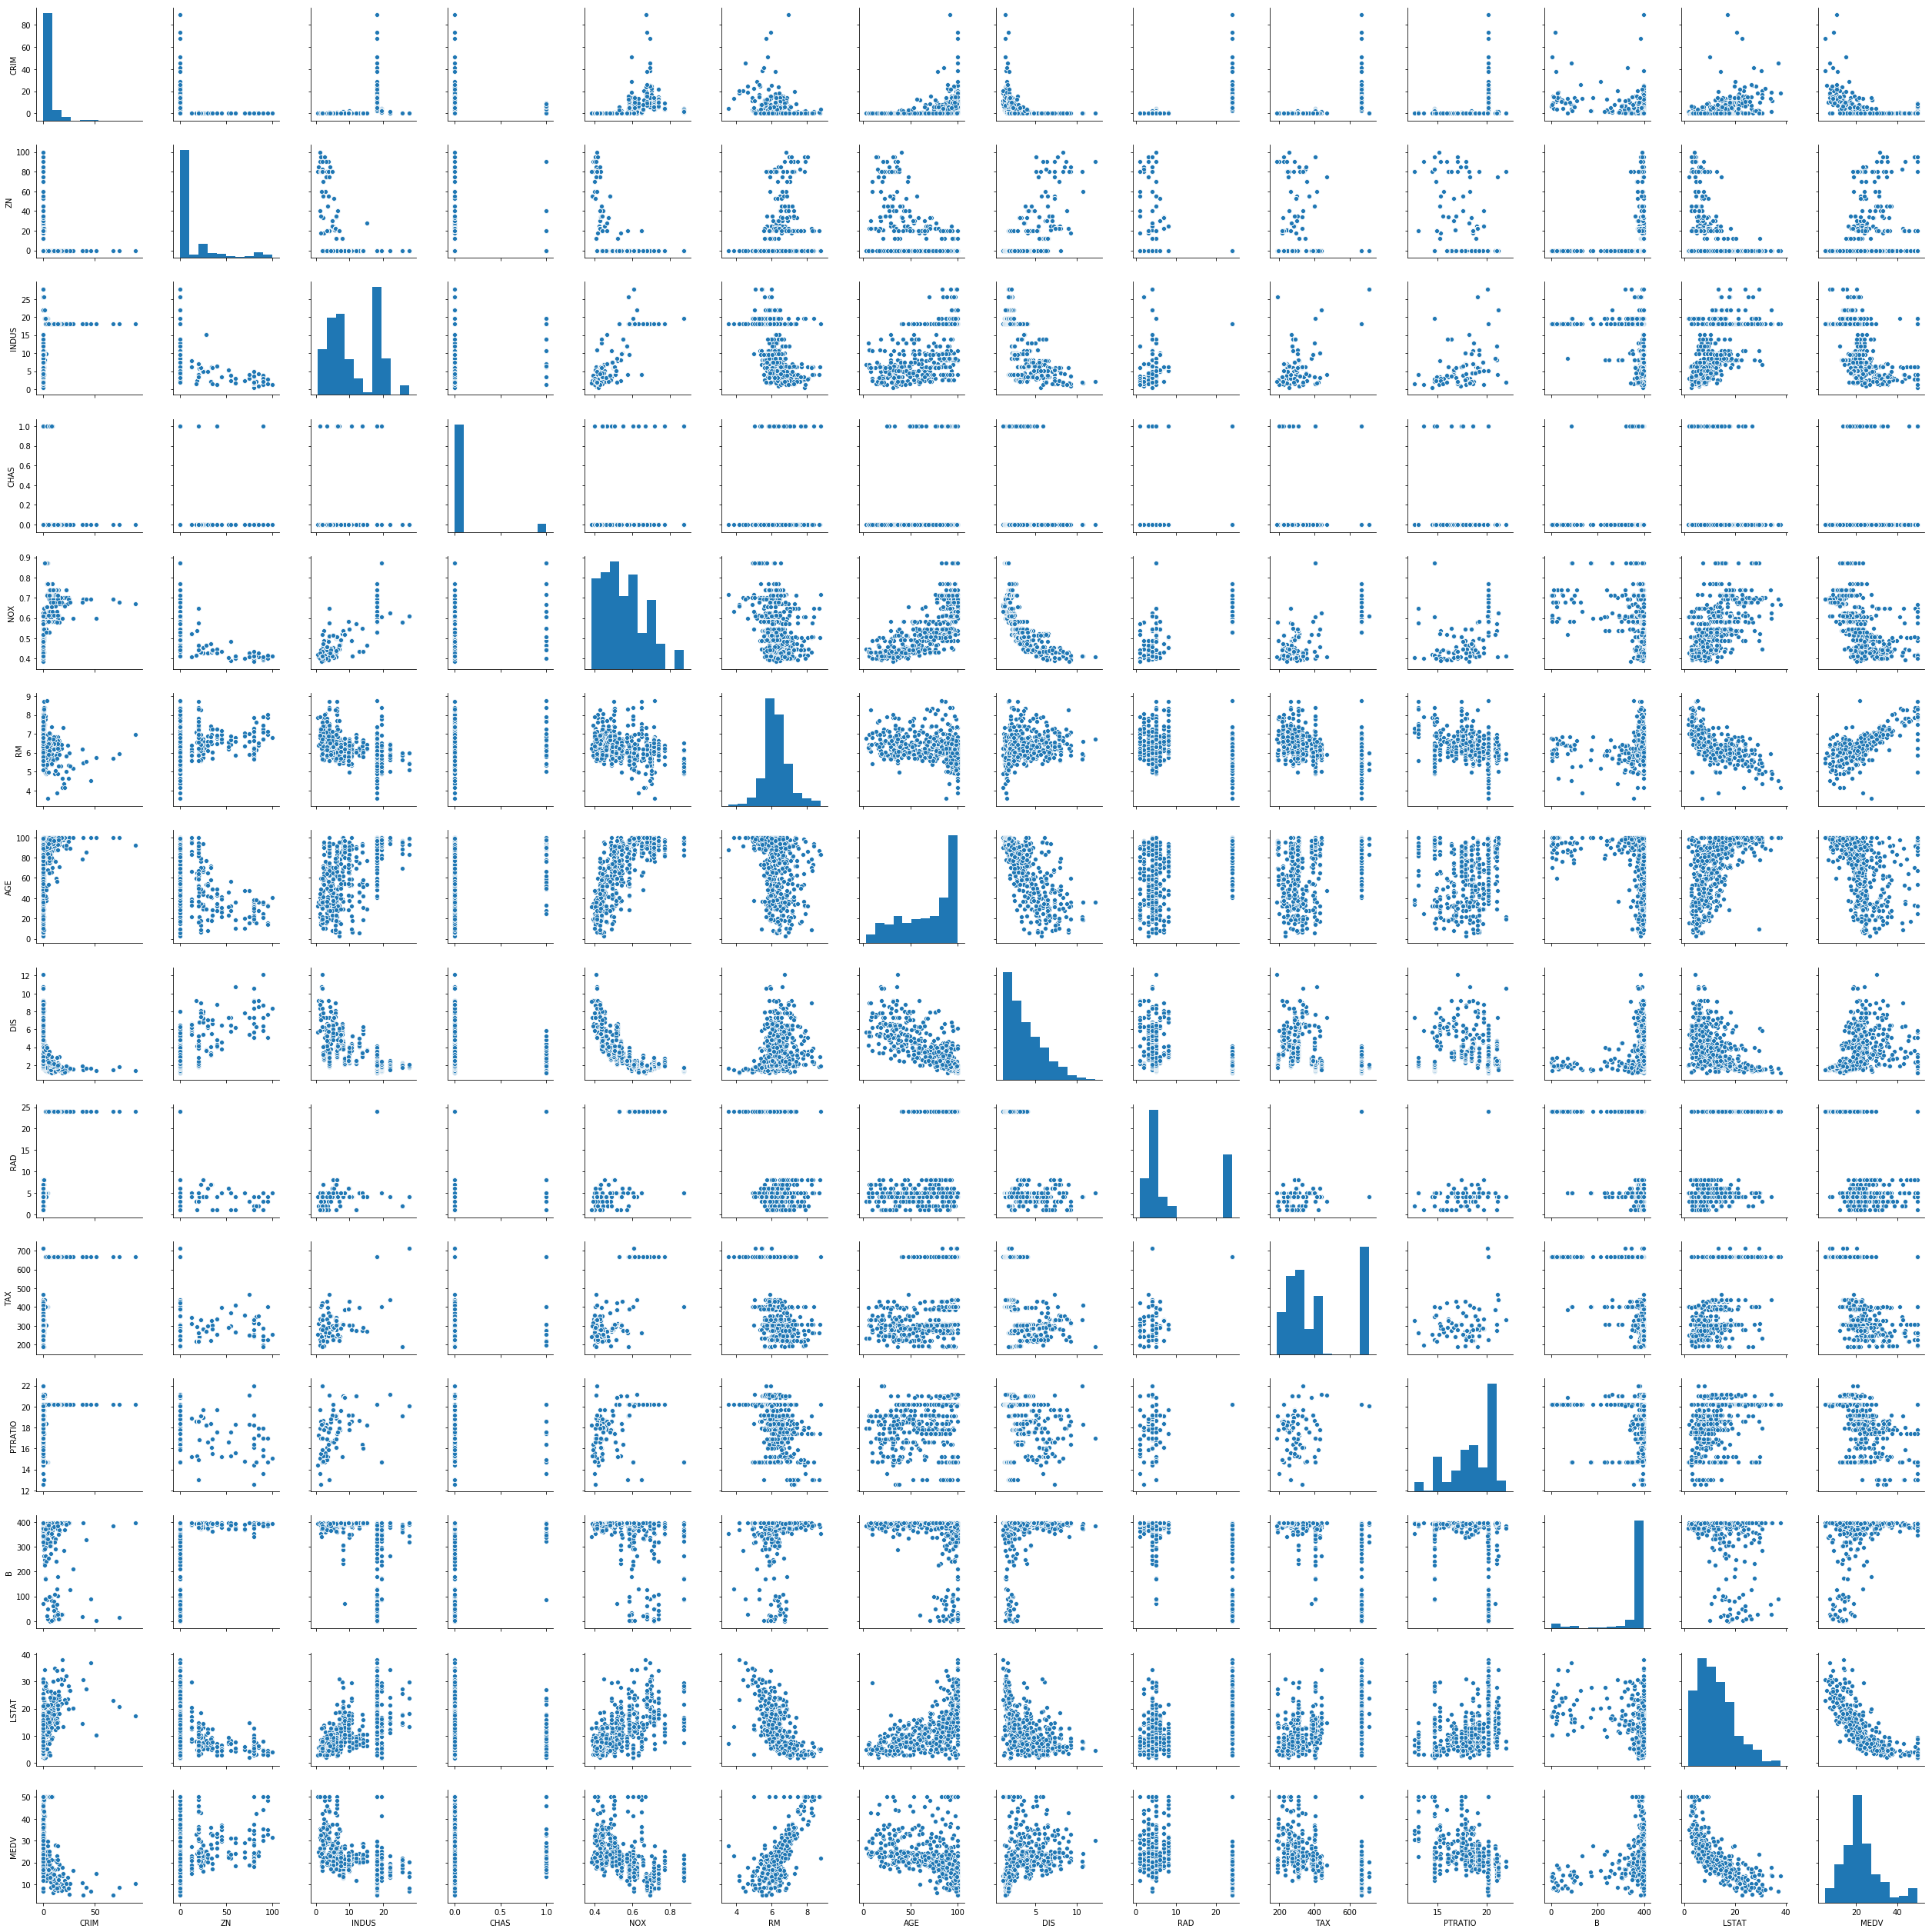

In [8]:
sns.pairplot(housing, height = 2.5)
plt.tight_layout()
plt.show()

### Passo 05: Método tail() 
Esse método mostra as últimas cinco linhas do conjunto de dados.

In [9]:
housing.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


### Passo 06: Método corr()

Esse método calcula a correlação entre os atributos do conjunto de dados. Por padrão, o método de correlação empregado é o *Pearson correlation coefficient*, que é uma medida linear de correlação entre duas variáveis. Quanto mais próxima de 1, mais forte é a correlação em um sentido positivo; quanto mais próxima de -1, mais forte ela é em um sentido negativo; e, por último, quanto mais próxima de 0, menor é a correlação entre as duas variáveis consideradas.

In [10]:
housing.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


## 3) Separe parte dos dados para treino (70%) e parte para teste (30%). 

### Passo 01: Extrair os valores
Primeiramente, extrairemos os valores contidos na estrutura *housing*, que é do tipo *DataFrame*. Para isso, utilizaremos o atributo *values*, que retorna uma estrutura NumPy que contém os dados existentes na estrutura *housing*,  retirando-se os nomes dos eixos, e a salvaremos na estrutura  **dataset**.

In [11]:
dataset = housing.values

In [12]:
# np.random.seed(1)
#np.random.shuffle(dataset)

### Passo 02: Separar variáveis de entrada e de saída

Agora, salvaremos na estrutura X todas as características que serão utilizadas pelo algoritmo de aprendizado para realizar a regressão. Elas podem ser entendidas como a entrada do sistema. Então, salvaremos na estrutura Y todos os lables, que, neste caso, são valores contínuos do conjunto de dados que representam os valores das casas. Eles podem ser entendidos como a saída do sistema e correspondem aos valores que o algoritmo dever prever, de acordo com a entrada recebida.

In [52]:
X = dataset[:, :13]
y = dataset[:, -1]

### Passo 03: Criação dos conjuntos de treino e de teste
Por fim, criaremos os conjuntos de treino e teste, salvando, nas estruturas **X_train** e **y_train**, 70% dos dados e, nas estruturas **X_test** e **y_test**, os 30% restantes. Nas estruturas que começam com *X_* estão os dados de entrada e nas que começam com *y_*, os de saída.

In [51]:
n_train = int(round(len(y) * 0.70))
X_train = X[:n_train,:]
y_train = y[:n_train]
X_test = X[n_train:,:]
y_test = y[n_train:]


X_train_std = standardization_normalization.standardization(X_train)
y_train_std = standardization_normalization.standardization(y_train)
X_test_std = standardization_normalization.standardization(X_test)
y_test_std = standardization_normalization.standardization(y_test)

X_train_norm = standardization_normalization.minMaxScaling(X_train)
y_train_norm = standardization_normalization.minMaxScaling(y_train)
X_test_norm = standardization_normalization.minMaxScaling(X_test)
y_test_norm = standardization_normalization.minMaxScaling(y_test)

## 4) Criar modelos de aprendizado

### Modelo 01: Regressão Linear com Gradiente Descendente (Arquivo Externo)

A Regressão Linear com Gradiente Descendente é semelhante ao Adaline, mas sem a função de passo unitário.

#### Sem preprocessamento dos dados:

In [15]:
reg_linear_externo = regressao_linear_GD.LinearRegressionGD(n_iter = 500, eta = 0.00000001)

In [16]:
reg_linear_externo.fit(X_train, y_train)

In [17]:
y_pred1 = reg_linear_externo.predict(X_test)

#### Com standardização dos dados:

In [18]:
reg_linear_externo_std = regressao_linear_GD.LinearRegressionGD(n_iter = 500, eta = 0.00000001)

In [19]:
reg_linear_externo_std.fit(X_train_std, y_train_std)

In [20]:
y_pred1_std = reg_linear_externo_std.predict(X_test_std)

#### Com normalização dos dados:

In [21]:
reg_linear_externo_norm = regressao_linear_GD.LinearRegressionGD(n_iter = 500, eta = 0.00000001)

In [22]:
reg_linear_externo_norm.fit(X_train_norm, y_train_norm)

In [23]:
y_pred1_norm = reg_linear_externo_norm.predict(X_test_norm)

### Modelo 02: Regressão Linear do ScikitLearn

#### Sem preprocessamento dos dados:

In [24]:
reg_linear_scikit = LinearRegression()

In [25]:
reg_linear_scikit.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
y_pred2 = reg_linear_scikit.predict(X_test)

#### Com standardization dos dados:

In [27]:
reg_linear_scikit_std = LinearRegression()

In [28]:
reg_linear_scikit_std.fit(X_train_std, y_train_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
y_pred2_std = reg_linear_scikit_std.predict(X_test_std)

#### Com normalização dos dados:

In [30]:
reg_linear_scikit_norm = LinearRegression()

In [31]:
reg_linear_scikit_norm.fit(X_train_norm, y_train_norm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
y_pred2_norm = reg_linear_scikit_norm.predict(X_test_norm)

### Modelo 03: Regressor com Gradiente Descendente Estocástico (ScikitLearn)

#### Sem preprocessamento dos dados:

In [33]:
reg_SGD = linear_model.SGDRegressor(max_iter = 500, tol=1e-3, eta0 = 0.00000001)

In [34]:
reg_SGD.fit(X_train, y_train)

/home/marianna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1219: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=1e-08, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=500,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [35]:
y_pred3 = reg_SGD.predict(X_test)

#### Com standardization dos dados:

In [36]:
reg_SGD_std = linear_model.SGDRegressor(max_iter = 500, tol=1e-3, eta0 = 0.00000001)

In [37]:
reg_SGD_std.fit(X_train_std, y_train_std)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=1e-08, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=500,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [38]:
y_pred3_std = reg_SGD_std.predict(X_test_std)

#### Com normalização dos dados:

In [39]:
reg_SGD_norm = linear_model.SGDRegressor(max_iter = 500, tol=1e-3, eta0 = 0.00000001)

In [40]:
reg_SGD_norm.fit(X_train_norm, y_train_norm)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=1e-08, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=500,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [41]:
y_pred3_norm = reg_SGD_norm.predict(X_test_norm)

## 5) Comparar resultados utilizando a métric RMSE

A RMSE (root-mean-square error) é utilizada para se calcular as diferenças entre os valores preditos por um modelo ou um estimador e os valores observados. Ela é uma medida de acurácia para comparar erros de previsão de diferentes modelos para um mesmo conjunto de dados ([RMSD](https://en.wikipedia.org/wiki/Root-mean-square_deviation)).

### Modelo 01:

#### Sem preprocessamento dos dados:

In [42]:
metricas.rmse(y_test, y_pred1)

11.315213059380936

#### Com standardization dos dados:

In [43]:
metricas.rmse(y_test_std, y_pred1_std)

0.9999512334159297

#### Com normalização dos dados:

In [44]:
metricas.rmse(y_test_norm, y_pred1_norm)

0.3150292738906244

### Modelo 02:

#### Sem preprocessamento dos dados:

In [45]:
metricas.rmse(y_test, y_pred2)

23.386307030634267

#### Com standardization dos dados:

In [46]:
metricas.rmse(y_test_std, y_pred2_std)

1.988178770503338

#### Com normalização dos dados:

In [47]:
metricas.rmse(y_test_norm, y_pred2_norm)

0.4148106981093815

### Modelo 03:

#### Sem preprocessamento dos dados:

In [48]:
metricas.rmse(y_test, y_pred3)

12.831502442299946

#### Com standardization dos dados:

In [49]:
metricas.rmse(y_test_std, y_pred3_std)

0.9999998794923427

#### Com normalização dos dados:

In [50]:
metricas.rmse(y_test_norm, y_pred3_norm)

0.31600839952239806

Conforme podemos observar, os erros quadráticos médios dos três modelos mostram-se muito grandes, se comparados aos obtidos quando relizamos o preprocessamento dos dados. Isso pode ser devido às diferenças de dimensões entre as features, fazendo com que seus valores acabem possuindo dimensões muito diferentes e algumas features tenham mais impacto do que outras no cálculo dos coeficientes de aprendizado.

Por outro lado, quando aplicamos a standardização e a normalização dos dados, os erros quadráticos médios mostram-se bem menores, pois, agora, os dados estão nas mesmas escalas.

Dessa maneira, quando não realizamos o preprocessamento dos dados, o modelo que apresenta o melhor resultado, com relação a RMSE, é o modelo 01. Quando fazemos a standardização dos dados, o modelo com melhor resultado também é o 01. Por fim, quando fazemos a normalização dos dados aplicando Dimensionamento MinMax (minMaxScaling), o modelo 01 apresenta o melhor resultado.

Uma dúvida que surge é com relação aos hiperparâmetros do modelo 02 (n_iter e eta), que não puderam ser configurados.